# Lesson 09 - Workalong 2, Step 1
This notebook develops and tests the code for a function that generates a plot of some interesting weather.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cmocean
import os

In [2]:
# set the path to the input data file
input_file = "/N/scratch/obrienta/easg690/e5.oper.an.sfc.128_136_tcw.ll025sc.2021060100_2021063023.nc"
    #this is a new file bc some didnt have access yet to the slate one

# set the directory where we'll save the images
output_dir = "./animation_frames" #NOTE: did not know this

# set the timestep to plot
i = 0 #NOTE: what about this? how do you know to do this?

# make sure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# load the data file
ds_in = xr.open_dataset(input_file, chunks = -1)
ds_in

<xarray.Dataset>
Dimensions:    (time: 720, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2021-06-01 ... 2021-06-30T23:00:00
Data variables:
    TCW        (time, latitude, longitude) float32 dask.array<chunksize=(720, 721, 1440), meta=np.ndarray>
    utc_date   (time) int32 dask.array<chunksize=(720,), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.7.4
    CONVERSION_PLATFORM:  Linux r4i1n35 4.12.14-95.51-default #1 SMP Fri Apr ...
    CONVERSION_DATE:      Fri Sep  3 11:04:41 MDT 2021
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Sep  3 11:04:57 2021: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.9.5 (Homepage = http://n...

AttributeError: 'DataArray' object has no attribute 'lat'

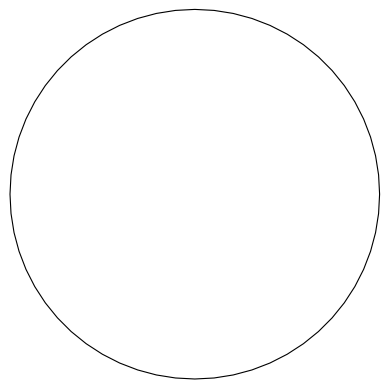

In [13]:
# get the variable at the requested timestep
time1 = ds_in["TCW"].isel(time=i)

# plot the variable on an orthographic projection centered on
# Bloomington, IN

#set coords of bloomington IN
bloomington_lon = -86.526386
bloomington_lat = 39.165325
projection = cartopy.crs.Orthographic(central_longitude=bloomington_lon, central_latitude=bloomington_lat)
transform = cartopy.crs.PlateCarree()#others - mercator?

# plot the data
#create a fig
fig, ax = plt.subplots(subplot_kw= dict(projection = projection))

#draw on the data
#tcw = time1.sel(time = i) #(season = 'DJF')
tcw_dimensions = ds_in['TCW'].squeeze()
lat = tcw_dimensions.lat
lon = tcw_dimensions.lon
ax.pcolormesh(lon, lat, tcw, transform = transform)


#drwa continent boundary
ax.coastlines()

#plot a point VERY ROUGHLY corresponding to bloomington IN
ax.plot(bloomington_lon, bloomington_lat, 'r*', transform = transform)

#set a glbal extent
ax.set_global()

plt.show()

# get the time of the timestep

# convert it to a datetime object

# add a title with a nicely formatted date

# add coastlines

# save the plot

In [ ]:
""" Make a function to plot and save the data at a given timestep. """

def generate_frame(
        i : int,
        input_file = "/N/project/obrienta_startup/datasets/ERA5/ds633.0/e5.oper.an.sfc/202106/e5.oper.an.sfc.128_136_tcw.ll025sc.2021060100_2021063023.nc",
        output_dir = "./animation_frames/"):

        # copy the code from above here; have this function return the output file name
        pass



In [ ]:
""" Test the function. """

# set the timestep to plot (select a new timestep)

# generate the plot